# info

1. 各質的変数の値ごとに目的変数の割合を積み上げ棒グラフで確認している
1. 量的変数のヒストグラムを目的変数の値ごとに確認している
1. 量的変数同士の散布図を目的変数の値ごとに色を付けして確認している
1. 量的変数同士の相関係数を確認している

# init

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
plt.style.use('seaborn')

In [2]:
def config_plot(h=10):
    plt.rcParams["font.size"] = 1.5*h
    return (1.62*h, h)

# load

In [3]:
path_doc = "../doc/"
path_img = path_doc + "img/"

In [4]:
path_data = "../data/"
path_raw = path_data + "raw/"
path_mid = path_data + "mid/"

In [5]:
cats = pd.read_csv(path_mid+"cats.csv", index_col=0)
nums = pd.read_csv(path_mid+"nums.csv", index_col=0)
bools = pd.read_csv(path_mid+"bools.csv", index_col=0)

In [6]:
# 家族の人数は質的変数として確認してみる
cats = cats.join(nums[["parch", "sibsp"]])

In [7]:
y = nums[["survived"]].dropna()

# viz

## cat

In [8]:
def plot_cat(data, x, y):
    freq = data.pivot_table(index=x, columns=y, aggfunc="size")
    rate = freq.div(freq.sum(1), axis=0)

    _, axes = plt.subplots(ncols=2, nrows=1, figsize=config_plot(), sharex=True)    
    ax = axes.ravel()

    f1 = freq.plot.bar(stacked=True, figsize=(16,5), ax=ax[0])
    f1.set_ylim(ymax=freq.sum().sum())
    f1.set_ylabel("count")
    f1.legend(loc="upper right")

    f2 = rate.plot.bar(stacked=True, figsize=(16,5), ax=ax[1])
    f2.set_ylim(ymin=0, ymax=1)
    f2.set_ylabel("rate")
    f2.legend(loc="upper right")

    p = path_img+"bi_cat_%s.png"%x
    plt.savefig(p)

    print("###", x)
    print("![](%s)"%p)

In [9]:
data = cats.copy()
data = data.join(y, how="inner")

### embarked
![](../doc/img/bi_cat_embarked.png)
### pclass
![](../doc/img/bi_cat_pclass.png)
### sex
![](../doc/img/bi_cat_sex.png)
### parch
![](../doc/img/bi_cat_parch.png)
### sibsp
![](../doc/img/bi_cat_sibsp.png)


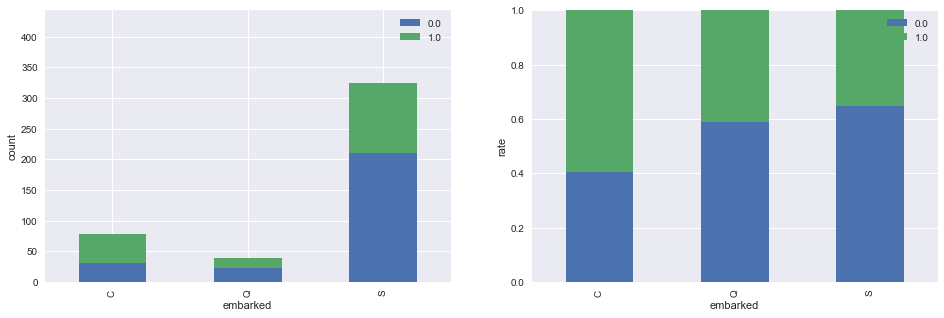

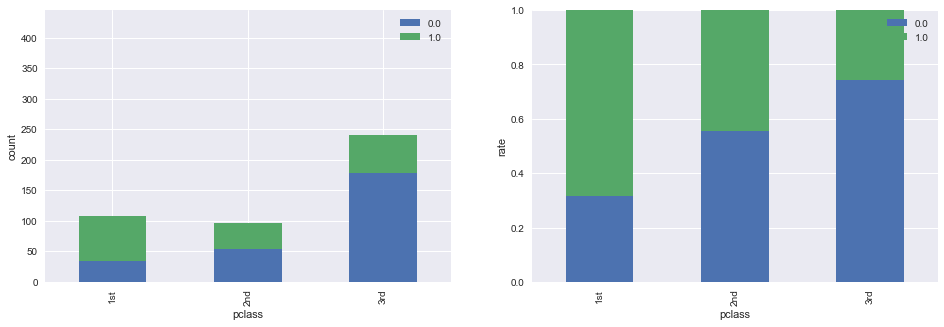

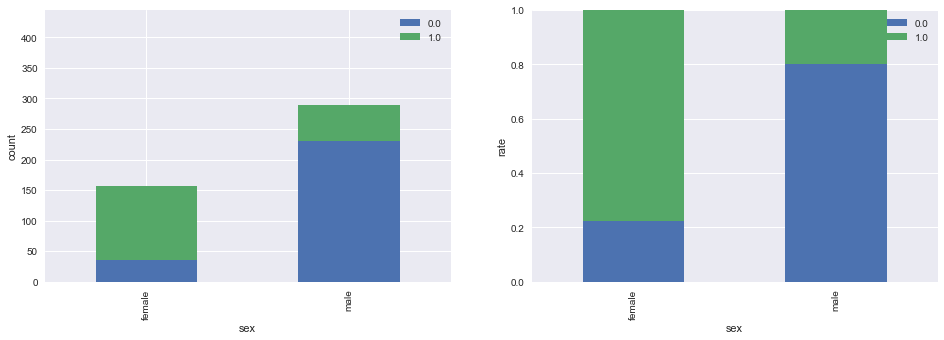

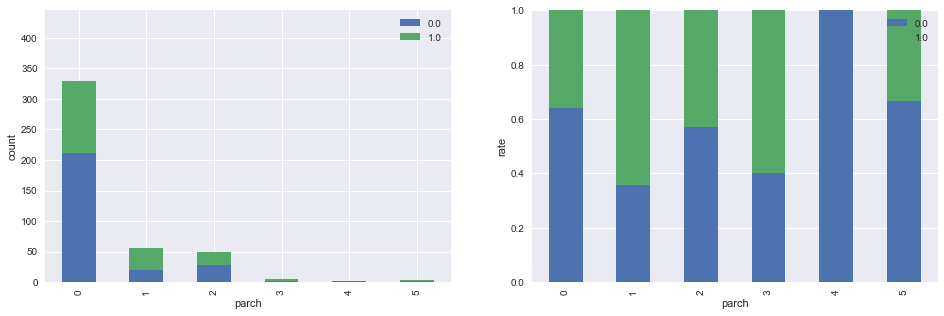

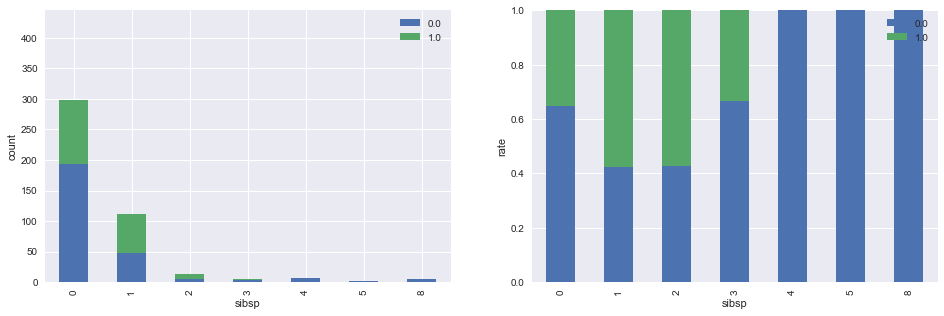

In [10]:
for x in cats:
    plot_cat(data, x, "survived")

## bool

In [11]:
data = bools.copy()
data = data.join(y, how="inner")

### isna_age
![](../doc/img/bi_cat_isna_age.png)
### iszero_fare
![](../doc/img/bi_cat_iszero_fare.png)


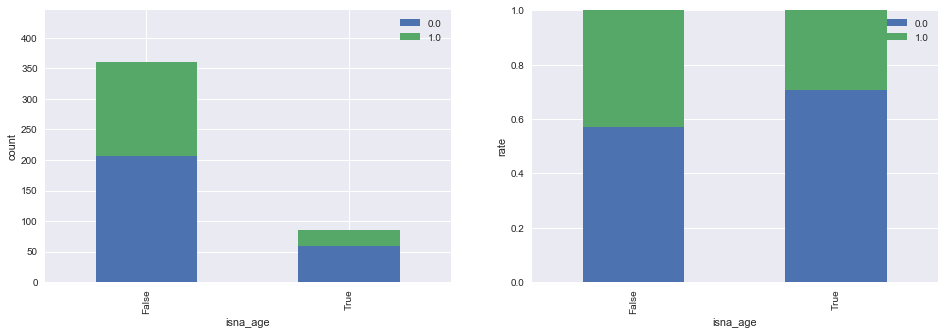

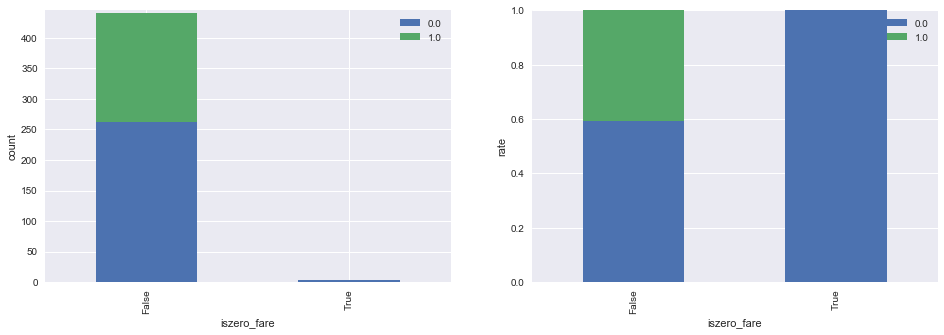

In [12]:
for x in bools:
    plot_cat(data, x, "survived")

##### チェックポイント1: 各質的変数の値ごとに目的変数の割合を積み上げ棒グラフで確認している
- 次の値はまとめる
    - embarked: Q, S(傾向の違いが論理的・統計的にも見つからないため)
    - parch: 4以上(傾向の違いが論理的・統計的にも見つからないため)
    - sibsp: 4以上(傾向の違いが論理的・統計的にも見つからないため)

# num

In [13]:
print(nums.skew())
print(np.log1p(nums).skew())

age         0.389108
fare        4.787317
parch       2.749117
sibsp       3.695352
survived    0.400055
dtype: float64
age        -1.877488
fare        0.394928
parch       1.675439
sibsp       1.661245
survived    0.400055
dtype: float64


In [14]:
data = nums.copy()
data = data.dropna()
data["survived"] = data.survived.apply(lambda x: "survived" if x > 0 else "no survived")

C:\Users\keisu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1166.4x720 with 0 Axes>

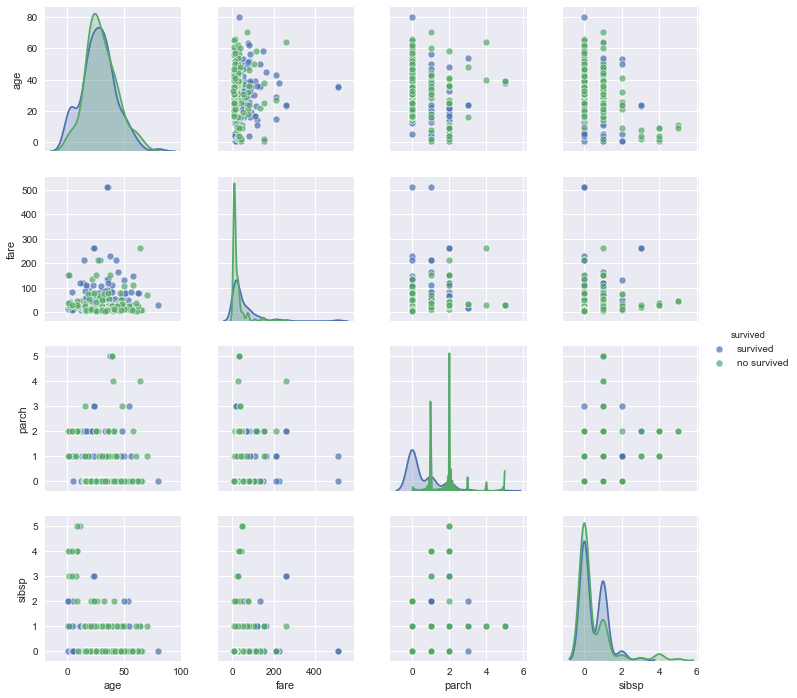

In [15]:
plt.figure(figsize=config_plot())
sns.pairplot(data=data, hue="survived", plot_kws={'alpha': 0.7})
p = path_img+"bi_num_scatter.png"
plt.savefig(p)

In [16]:
data = np.log1p(nums).copy()
data = data.dropna()
data["survived"] = data.survived.apply(lambda x: "survived" if x > 0 else "no survived")

C:\Users\keisu\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 1166.4x720 with 0 Axes>

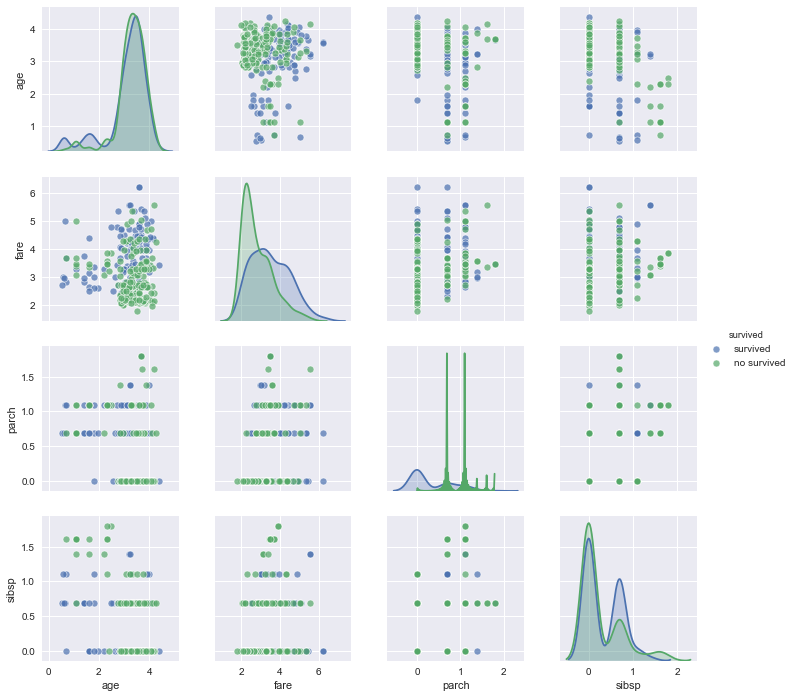

In [17]:
plt.figure(figsize=config_plot())
sns.pairplot(data=data, hue="survived", plot_kws={'alpha': 0.7})
p = path_img+"bi_num_scatter.png"
plt.savefig(p)

##### チェックポイント2: 量的変数のヒストグラムを目的変数の値ごとに確認している
    - ageは値が低い領域で生存者割合が大きい→childフラグを作成すると効きそう
##### チェックポイント3: 量的変数同士の散布図を目的変数の値ごとに色を付けして確認している

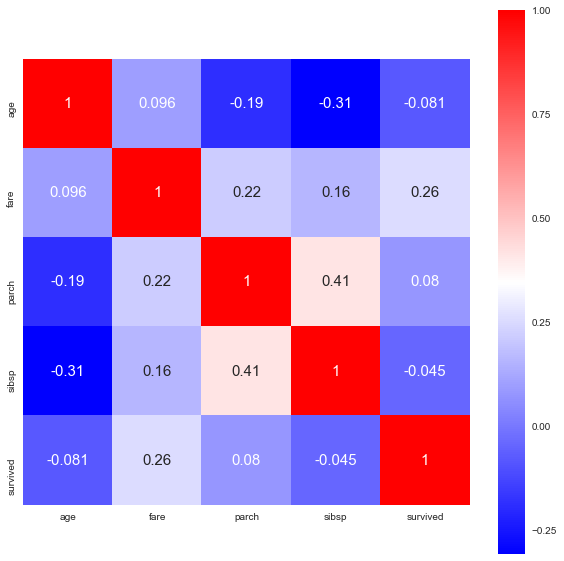

In [18]:
plt.figure(figsize=(10,10))
data = nums.corr()
sns.heatmap(data=data, square=True, cmap="bwr", annot=True)
p = path_img+"bi_num_corr_pearson.png"
plt.savefig(p)

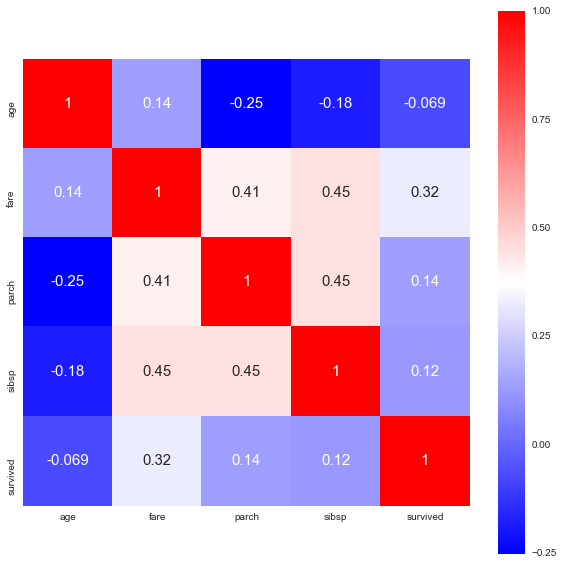

In [19]:
plt.figure(figsize=(10,10))
data = nums.corr("spearman")
sns.heatmap(data=data, square=True, cmap="bwr", annot=True)
p = path_img+"bi_num_corr_spearman.png"
plt.savefig(p)

##### チェックポイント4: 量的変数同士の相関係数を確認している
- 高相関な変数組は存在しない
- 質的変数と相関する値は存在する(fareとpclassなど)ので適宜選定する

# advance

## family-size

In [20]:
cats["family_size"] = cats.parch + cats.sibsp

In [21]:
data = cats.copy()
data = data.join(y, how="inner")

### family_size
![](../doc/img/bi_cat_family_size.png)


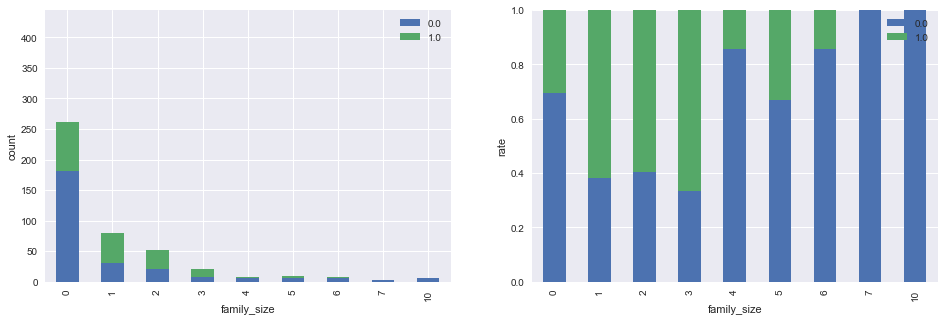

In [22]:
plot_cat(data, "family_size", "survived")

## age-cutoff

In [23]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [24]:
data = nums[["age"]].join(y, how="inner")
data = data.dropna()

In [25]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(data[["age"]], data.survived)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
dot_data = export_graphviz(
                        clf,
                        class_names=["a", "b"],
                        feature_names=["age"],
                        filled=True,
                        rounded=True,
                        out_file=None
                    )
graph = graphviz.Source(dot_data)
graph.render(path_img+"tree_age", format="png")

'../doc/img/tree_age.png'

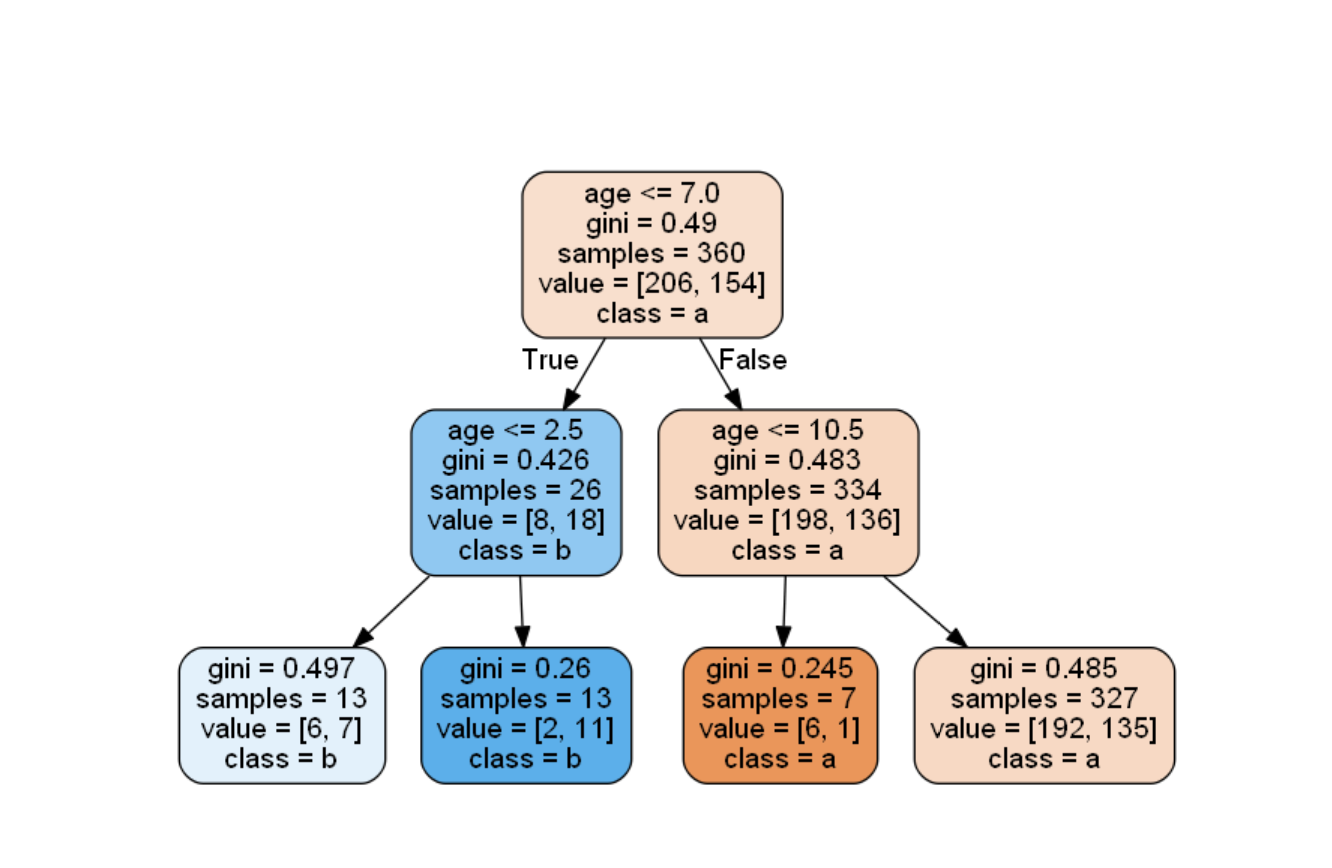